In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
import autokeras as ak
import numpy as np

Using TensorFlow backend


In [2]:
model = tensorflow.keras.models.load_model('./structured_data_classifier/best_model')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1776)]            0         
                                                                 
 multi_category_encoding (M  (None, 1776)              0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 1776)              3553      
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                56864     
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [3]:
# Load training dataset
df1 = pd.read_csv('../train.csv')
#df1.describe() # Visualize

# Load testing dataset
kaggle_test = pd.read_csv('../test.csv')
# test.describe() # Visualize

# Separate labels from training dataset for fitting
labels = df1['Activity']
del df1['Activity']

# 60/20/20 train test validate split
#x_train, x_test, y_train, y_test = train_test_split(df1, labels, test_size=0.2)
x, x_test, y, y_test = train_test_split(df1,labels,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)
input_shape = x_train.shape
print("Shape of Input Data: " + str(input_shape))
print("Shape of Test Labels: " + str(y_test.shape))
print("Shape of Validation Labels: " + str(y_cv.shape))

Shape of Input Data: (2250, 1776)
Shape of Test Labels: (751,)
Shape of Validation Labels: (750,)


In [4]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
)

history = model.fit(
    x_train, y_train, epochs=100, validation_data=(x_cv, y_cv)
)

Epoch 1/100
71/71 [==============================] - 54s 337ms/step - loss: 0.4756 - accuracy: 0.9444 - val_loss: 0.6419 - val_accuracy: 0.9360
Epoch 2/100
71/71 [==============================] - 8s 112ms/step - loss: 0.1757 - accuracy: 0.9636 - val_loss: 0.5020 - val_accuracy: 0.9387
Epoch 3/100
71/71 [==============================] - 6s 89ms/step - loss: 0.0969 - accuracy: 0.9729 - val_loss: 0.5016 - val_accuracy: 0.9360
Epoch 4/100
71/71 [==============================] - 6s 81ms/step - loss: 0.0728 - accuracy: 0.9747 - val_loss: 0.4969 - val_accuracy: 0.9360
Epoch 5/100
71/71 [==============================] - 6s 89ms/step - loss: 0.0570 - accuracy: 0.9782 - val_loss: 0.5037 - val_accuracy: 0.9333
Epoch 6/100
71/71 [==============================] - 6s 84ms/step - loss: 0.0455 - accuracy: 0.9840 - val_loss: 0.5176 - val_accuracy: 0.9360
Epoch 7/100
71/71 [==============================] - 6s 80ms/step - loss: 0.0388 - accuracy: 0.9853 - val_loss: 0.5308 - val_accuracy: 0.9347
Epo

24/24 [==============================] - 4s 46ms/step
Accuracy on internal test set:  0.8828229027962716


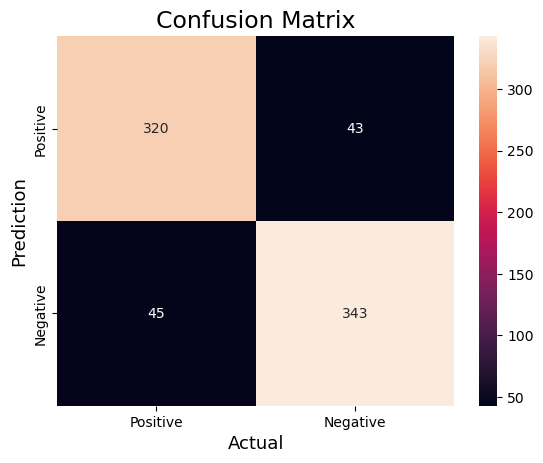

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

prob_output = model.predict(kaggle_test)

# Predict with Kaggle test set with classifier, format for Kaggle
submission = pd.DataFrame(prob_output, columns = ['PredictedProbability'])
submission['MoleculeId'] = submission.index + 1
#print(submission.head())
submission.to_csv('submissionDL5.csv',index = False)

# Predict on internal test set
DL_predictions = model.predict(x_test)
DL_predictions = DL_predictions.round()
acc = accuracy_score(y_test, DL_predictions)
cm = confusion_matrix(y_test, DL_predictions)
print("Accuracy on internal test set: ",acc)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
